In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [260]:
df=pd.read_csv('advertising.csv')

In [261]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [262]:
df.shape

(200, 4)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [264]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [265]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [266]:
df.duplicated().sum(
)

0

In [267]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Outlier Analysis



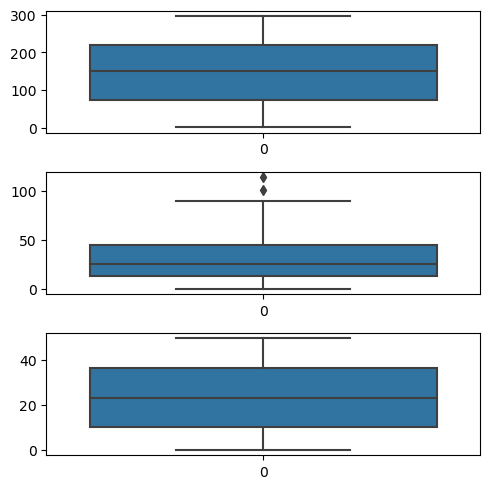

In [268]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outlier's present in the dataset

Target Variable

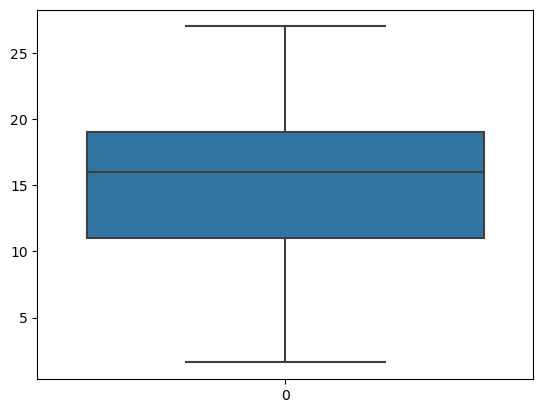

In [269]:
sns.boxplot(df['Sales'])
plt.show()

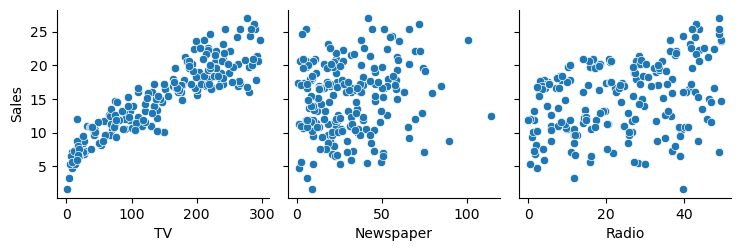

In [270]:
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',aspect=1,kind='scatter')
plt.show()

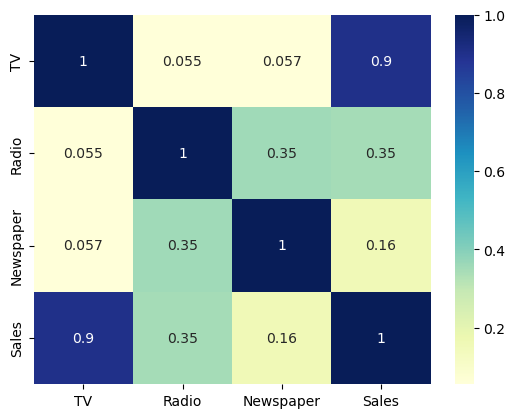

In [271]:
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [272]:
X=df.iloc[:,0:3]
y=df. iloc[:,-1:] 

In [273]:
X.shape

(200, 3)

In [274]:
y.shape

(200, 1)

As seen form both above plot TV seems to be most correlated with the Sales

we can take TV as our Target variable

In [275]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [276]:
X_train.head()

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [277]:
from sklearn.linear_model import LinearRegression


In [278]:
# NORMALIZING OUR DATA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [279]:
lr=LinearRegression()

In [280]:
lr.fit(scaled_X_train,y_train)

LinearRegression()

In [281]:
y_pred=lr.predict(scaled_X_test)

In [282]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 2.6360765623280646
R2 Score: 0.8655979373420273


In [283]:
# RANDOM FOREST 
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
model=RF.fit(scaled_X_train,y_train)
y_pred2=model.predict(scaled_X_test)

C:\Users\agraw\AppData\Local\Temp\ipykernel_24448\3429068888.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model=RF.fit(scaled_X_train,y_train)


In [284]:
mse = mean_squared_error(y_test, y_pred2)
r2=r2_score(y_test,y_pred2)
print("Mean Squared Error:", mse)
print("R2 Score:",r2)

Mean Squared Error: 1.388354133333331
R2 Score: 0.9292138696248916


In [285]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Flatten the arrays
y_test_flat = y_test.flatten()
y_pred_flat = y_pred.flatten()

# Create the DataFrame
linr = pd.DataFrame({'actual': y_test_flat, 'predicted': y_pred_flat})

# Display the first few rows
linr.head()

,actual,predicted
0,6.6,9.352211
1,20.7,20.963446
2,17.2,16.488511
3,19.4,20.109710
4,21.8,21.671484


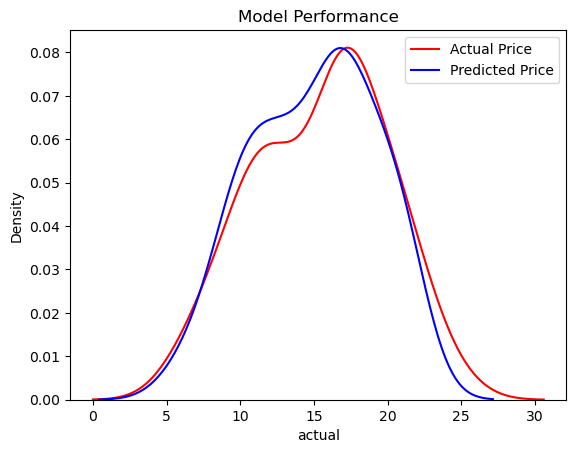

In [286]:
sns.kdeplot(linr['actual'],color='red',label='Actual Price')
sns.kdeplot(linr['predicted'],color='blue',label='Predicted Price')
plt.title("Model Performance")
plt.legend()

In [287]:
#Random Forest
y_test = np.array(y_test)
y_pred2 = np.array(y_pred2)

# Flatten the arrays
y_test_flat = y_test.flatten()
y_pred_flat = y_pred2.flatten()

# Create the DataFrame
linr = pd.DataFrame({'actual': y_test_flat, 'predicted': y_pred_flat})

# Display the first few rows
linr.head()

,actual,predicted
0,6.6,6.291
1,20.7,19.961
2,17.2,15.021
3,19.4,19.464
4,21.8,22.547


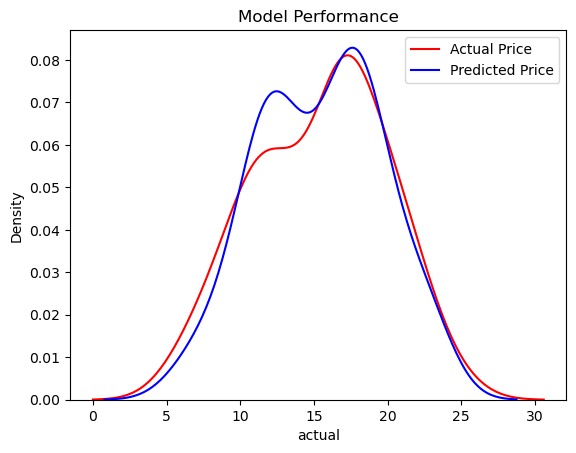

In [288]:
sns.kdeplot(linr['actual'],color='red',label='Actual Price')
sns.kdeplot(linr['predicted'],color='blue',label='Predicted Price')
plt.title("Model Performance")
plt.legend()